In [12]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import easyocr
import imutils
import random

Saving Test1.jpg to Test1 (1).jpg


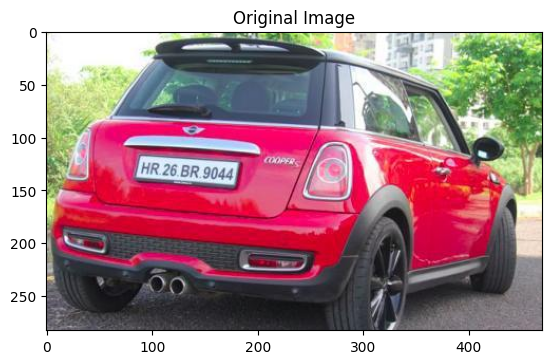

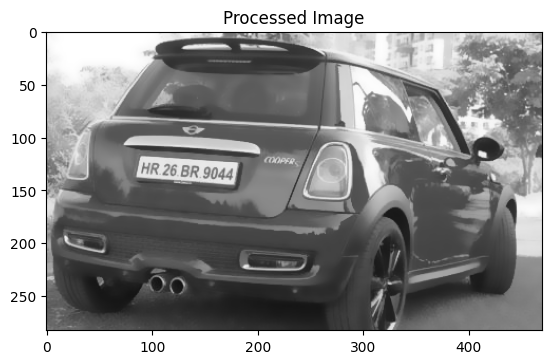

In [23]:
from google.colab import files
uploaded = files.upload()
img = cv2.imread('Test1.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
plt.imshow(cv2.cvtColor(bfilter, cv2.COLOR_BGR2RGB))
plt.title('Processed Image')
plt.show()

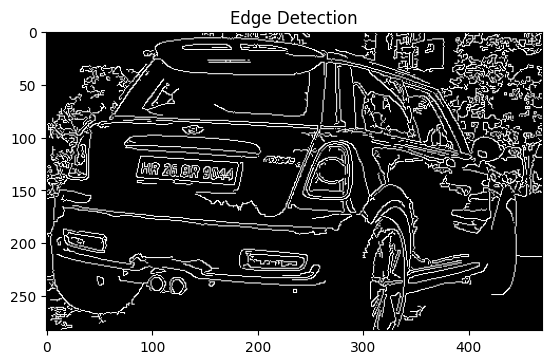

In [24]:
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
plt.title('Edge Detection')
plt.show()

In [25]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
print("Location: ", location)

Location:  [[[ 85 137]]

 [[178 145]]

 [[182 126]]

 [[ 89 118]]]


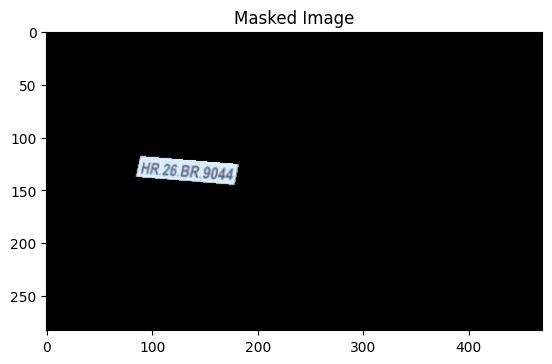

In [26]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.title('Masked Image')
plt.show()

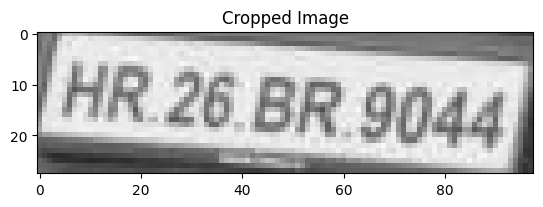

In [27]:
(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.show()

In [31]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)

Detected Text:  HR.26 BR 9044


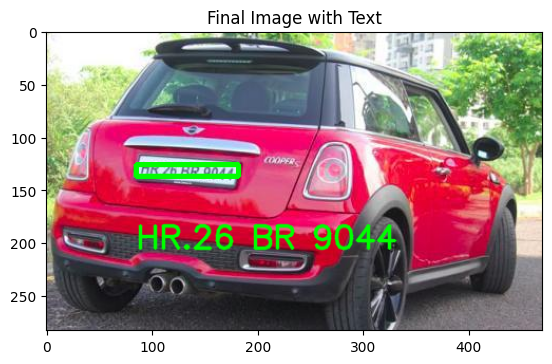

In [32]:
text = result[0][-2]
print("Detected Text: ", text)
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(location[0][0][0], location[1][0][1] + 60), fontFace=font, fontScale=1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(location[0][0]), tuple(location[2][0]), (0, 255, 0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.title('Final Image with Text')
plt.show()